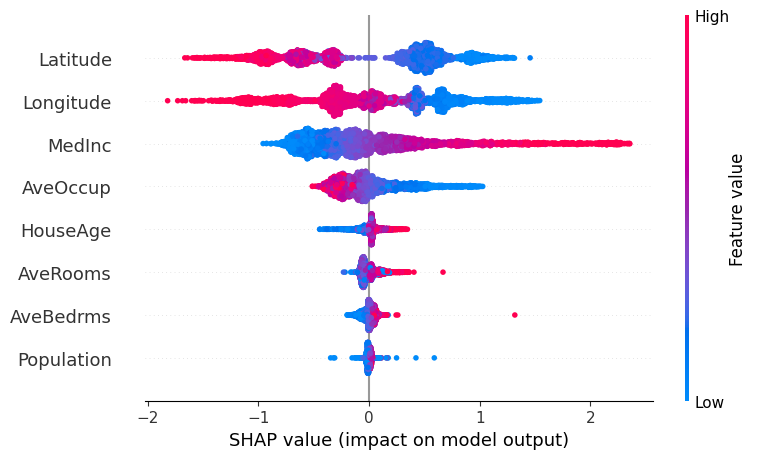

In [2]:
import shap
import xgboost as xgb
import matplotlib
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test)

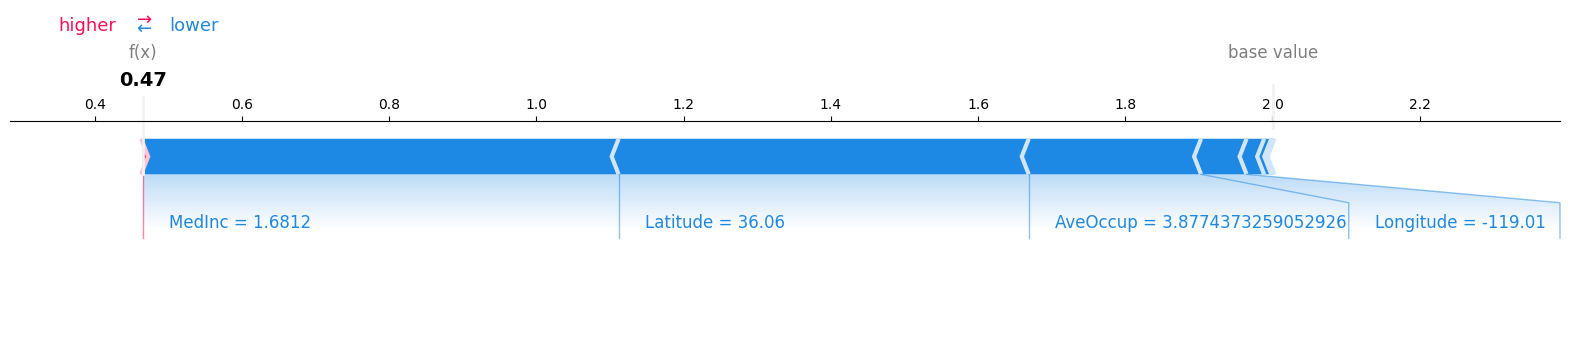

In [3]:
# Force plot for individual prediction
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values.values[0],       # Raw SHAP values for first sample
    features=X_test.iloc[0],                 # Raw feature values for that sample
    feature_names=X_test.columns,
    matplotlib=matplotlib
)